# 필요한 기능(라이브러리)들을 설치한다
### 🛠️ **데이터 분석 '필수 5대장' + 관리 도구 소개**
앞으로 우리가 사용할 강력한 도구들입니다. 게임으로 치면 '기본 아이템'이라고 생각하면 됩니다!

| **기능 이름** | **역할 (별명)** | **설명** |
| :--- | :---: | :--- |
| **`uv`** | **초고속 매니저** ⚡ | 파이썬 패키지 설치와 관리를 **압도적인 속도**로 처리해주는 최신 도구입니다. MCP 환경을 구축할 때 필수적으로 사용됩니다. |
| **`kagglehub`** | **데이터 셔틀** 🚚 | 인터넷(Kaggle)에 있는 방대한 데이터를 내 컴퓨터로 **다운로드**해 주는 도구입니다. |
| **`pandas`** | **슈퍼 엑셀** 🐼 | 엑셀보다 훨씬 강력합니다. 수만 줄의 데이터도 **순식간에 정렬하고 계산**하는 분석의 핵심 두뇌입니다. |
| **`matplotlib`** | **그래프 작도기** 📐 | 수학 시간에 모눈종이에 그림 그리듯, 데이터를 **기본적인 그래프(오리지널)**로 그려줍니다. |
| **`koreanize`** | **한글 패치** 🇰🇷 | 외국산 프로그램에 한글 패치 하듯이, 그래프에서 **한글이 깨지지 않게** 도와주는 필수 플러그인입니다. |
| **`seaborn`** | **비주얼 업그레이드** 🎨 | 기본 그래프(`matplotlib`)에 **세련된 스킨(테마)**을 입혀서, 보고서에 바로 쓸 수 있을 만큼 예쁘게 만들어줍니다. |

---

**💡 요약:**
1. **`uv`**로 필요한 도구들을 광속으로 세팅하고,
2. **`kagglehub`**로 데이터를 가져오고,
3. **`pandas`**로 데이터를 요리한 뒤,
4. **`seaborn`**으로 멋지게 플레이팅(시각화) 한다고 생각하면 이해가 빠를 거예요!

In [1]:
%pip install kagglehub pandas matplotlib koreanize-matplotlib seaborn uv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 데이터 수집 
kaggle에서 가져온다

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/nintendo-games")

print("Path to dataset files:", path)

/home/an0jin/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 36.3k/36.3k [00:00<00:00, 10.7MB/s]

Extracting files...
Path to dataset files: /home/an0jin/.cache/kagglehub/datasets/joebeachcapital/nintendo-games/versions/1


# 파이썬에서 엑셀을 다룰수 있게 하기
프롬프트 : NintendoGames.csv 파일을 읽는 코드를 작성해줘

In [6]:
import pandas as pd

df = pd.read_csv('NintendoGames.csv')
df.head()


,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


In [14]:
import pandas as pd

# 1. 'user_score' 컬럼의 데이터를 수치형(float)으로 변환합니다.
# 'tbd'와 같이 숫자로 변환할 수 없는 값들은 NaN(결측치)으로 처리합니다.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# 2. 분석에 필수적인 'platform'과 'user_score' 값이 없는 행(row)을 제거하여 데이터를 정제합니다.
df_clean = df.dropna(subset=['platform', 'user_score'])

# 3. 플랫폼별로 그룹화하여 유저 점수의 평균(mean), 데이터 개수(count), 표준편차(std)를 계산합니다.
# 결과는 평균 점수가 높은 순서대로 내림차순 정렬하여 어떤 플랫폼의 유저 만족도가 높은지 확인합니다.
platform_analysis = df_clean.groupby('platform')['user_score'].agg(['mean', 'count', 'std']).sort_values(by='mean', ascending=False)

# 4. 최종 분석 결과 출력
platform_analysis

,mean,count,std
platform,,,
N64,8.309677,31,0.645164
GBA,8.225397,63,0.947657
GC,8.207692,52,0.733738
WII,7.981429,140,0.841341
WIIU,7.695522,67,1.095505
DS,7.670769,130,0.890557
Switch,7.404142,169,1.161555
3DS,7.367016,191,0.878941
iOS,5.823077,13,1.464100


=== 📊 데이터 분석 결과 해석 ===
플랫폼      | 설명
------------------------------------------------------------
🏆 1위   | 'N64' 플랫폼이 평균 8.31점으로 가장 높은 유저 평가를 받았습니다.
📦 최다  | '3DS' 플랫폼은 가장 많은 191개의 게임이 분석에 포함되었습니다.

=== 💡 각 컬럼(열)이 의미하는 것 ===
1. mean (평균): 해당 기종 게임들의 평균 만족도입니다. (높을수록 좋음)
2. count (개수): 분석된 게임의 총 개수입니다. 수치가 너무 적으면 평균의 신뢰도가 낮을 수 있습니다.
3. std (표준편차): 점수의 기복입니다. 수치가 작으면 대부분 비슷한 평가를 받았다는 뜻이고, 크면 호불호가 갈린다는 뜻입니다.


/tmp/ipykernel_7656/477830865.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_analysis.index, y=platform_analysis['mean'], palette='viridis')


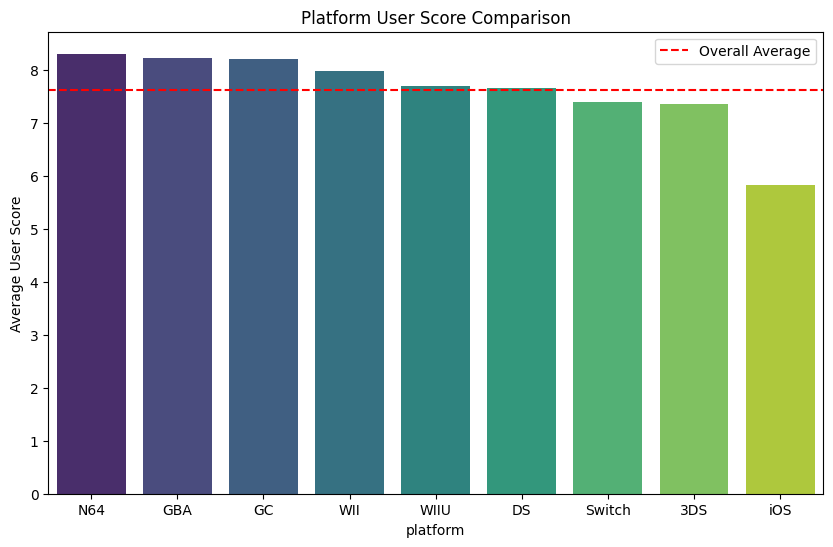

In [15]:
# 4-1. 분석 결과 상세 해석 (코드 실행 시 표의 의미를 해설해 줍니다)

print("=== 📊 데이터 분석 결과 해석 ===")
print(f"{'플랫폼':<8} | {'설명'}")
print("-" * 60)

# 가장 점수가 높은 플랫폼 찾기
top_platform = platform_analysis.index[0]
top_score = platform_analysis.iloc[0]['mean']

# 가장 게임 수가 많은 플랫폼 찾기
most_games = platform_analysis['count'].idxmax()
count_val = platform_analysis['count'].max()

print(f"🏆 1위   | '{top_platform}' 플랫폼이 평균 {top_score:.2f}점으로 가장 높은 유저 평가를 받았습니다.")
print(f"📦 최다  | '{most_games}' 플랫폼은 가장 많은 {int(count_val)}개의 게임이 분석에 포함되었습니다.")

print("\n=== 💡 각 컬럼(열)이 의미하는 것 ===")
print("1. mean (평균): 해당 기종 게임들의 평균 만족도입니다. (높을수록 좋음)")
print("2. count (개수): 분석된 게임의 총 개수입니다. 수치가 너무 적으면 평균의 신뢰도가 낮을 수 있습니다.")
print("3. std (표준편차): 점수의 기복입니다. 수치가 작으면 대부분 비슷한 평가를 받았다는 뜻이고, 크면 호불호가 갈린다는 뜻입니다.")

# 추가: 시각화로 한눈에 보기 (선택 사항)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_analysis.index, y=platform_analysis['mean'], palette='viridis')
plt.title('Platform User Score Comparison')
plt.ylabel('Average User Score')
plt.axhline(platform_analysis['mean'].mean(), color='red', linestyle='--', label='Overall Average')
plt.legend()
plt.show()

/tmp/ipykernel_7656/1710198411.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='user_score', data=df_clean, palette='Set3')
/home/an0jin/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/an0jin/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47019 (\N{HANGUL SYLLABLE RAES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/an0jin/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/an0jin/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170

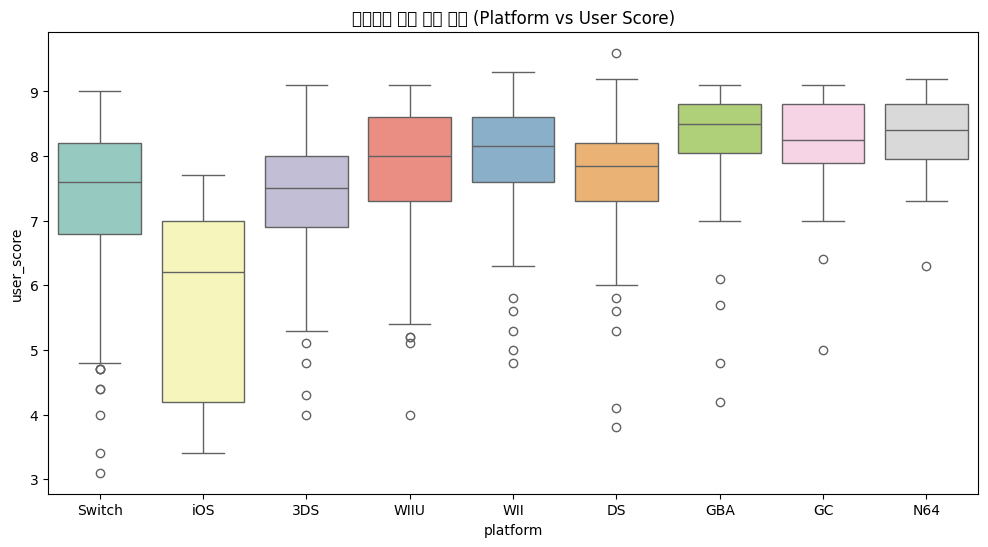

📊 분석 결과 (P-value): 0.0000000000

--- 결론 ---
✅ 통계적으로 유의미한 차이가 있습니다!
   → 플랫폼에 따라 유저들이 느끼는 재미(점수)가 확실히 다릅니다.
   → (어떤 플랫폼은 명작이 많고, 어떤 플랫폼은 평작이 많다는 뜻일 수 있습니다)


In [16]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 눈으로 확인하기 (박스 플롯)
# 점수의 범위와 분포를 한눈에 보여줍니다.
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='user_score', data=df_clean, palette='Set3')
plt.title('플랫폼별 유저 점수 분포 (Platform vs User Score)')
plt.show()

# 2. 수학적으로 검증하기 (ANOVA 분석)
# 플랫폼별로 점수 데이터를 모읍니다.
groups = [group['user_score'].values for name, group in df_clean.groupby('platform')]

# 일원분산분석(One-way ANOVA) 실행
f_val, p_val = stats.f_oneway(*groups)

print(f"📊 분석 결과 (P-value): {p_val:.10f}")

print("\n--- 결론 ---")
if p_val < 0.05:
    print("✅ 통계적으로 유의미한 차이가 있습니다!")
    print("   → 플랫폼에 따라 유저들이 느끼는 재미(점수)가 확실히 다릅니다.")
    print("   → (어떤 플랫폼은 명작이 많고, 어떤 플랫폼은 평작이 많다는 뜻일 수 있습니다)")
else:
    print("❌ 통계적으로 유의미한 차이가 없습니다.")
    print("   → 플랫폼보다는 게임 그 자체의 퀄리티가 점수에 더 큰 영향을 줍니다.")

# 한글이 깨지면? 
import koreanize_matplotlib을 위에다가 써주면 된다

/tmp/ipykernel_7656/3021166658.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='user_score', data=df_clean, palette='Set3')


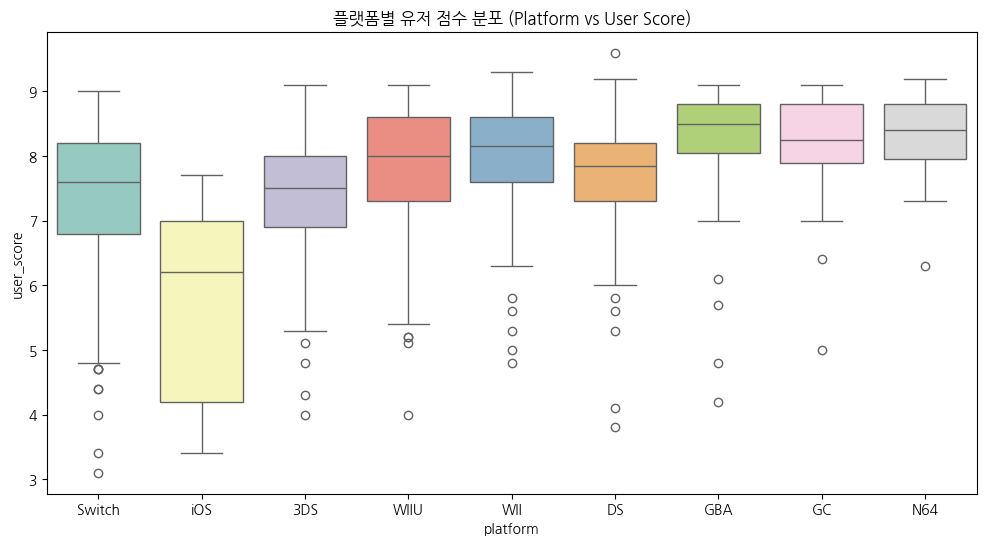

📊 분석 결과 (P-value): 0.0000000000

--- 결론 ---
✅ 통계적으로 유의미한 차이가 있습니다!
   → 플랫폼에 따라 유저들이 느끼는 재미(점수)가 확실히 다릅니다.
   → (어떤 플랫폼은 명작이 많고, 어떤 플랫폼은 평작이 많다는 뜻일 수 있습니다)


In [19]:
import koreanize_matplotlib #이 한줄이면 끝

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 눈으로 확인하기 (박스 플롯)
# 점수의 범위와 분포를 한눈에 보여줍니다.
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='user_score', data=df_clean, palette='Set3')
plt.title('플랫폼별 유저 점수 분포 (Platform vs User Score)')
plt.show()

# 2. 수학적으로 검증하기 (ANOVA 분석)
# 플랫폼별로 점수 데이터를 모읍니다.
groups = [group['user_score'].values for name, group in df_clean.groupby('platform')]

# 일원분산분석(One-way ANOVA) 실행
f_val, p_val = stats.f_oneway(*groups)

print(f"📊 분석 결과 (P-value): {p_val:.10f}")

print("\n--- 결론 ---")
if p_val < 0.05:
    print("✅ 통계적으로 유의미한 차이가 있습니다!")
    print("   → 플랫폼에 따라 유저들이 느끼는 재미(점수)가 확실히 다릅니다.")
    print("   → (어떤 플랫폼은 명작이 많고, 어떤 플랫폼은 평작이 많다는 뜻일 수 있습니다)")
else:
    print("❌ 통계적으로 유의미한 차이가 없습니다.")
    print("   → 플랫폼보다는 게임 그 자체의 퀄리티가 점수에 더 큰 영향을 줍니다.")


## 📊 2. 박스 플롯(Box Plot), 도대체 이게 뭐죠?

**"평균 점수만 믿지 마세요!"**
박스 플롯은 데이터가 **어디에 많이 몰려 있는지**, **얼마나 넓게 퍼져 있는지**를 한눈에 보여주는 그림입니다.

### 🏫 예시: 우리 반 30명의 수학 점수라고 상상해 봅시다.

```text
      [이상한 점수?]      [----- 범위 -----]   [박스]   [----- 범위 -----]
      
          ●                  |------------|======|======|------------|
          
        (0점)               (20점)      (40점) (50점) (70점)       (100점)
      
       ↑ 특이값             ↑ 최솟값      ↑ Q1   ↑ 중위수 ↑ Q3         ↑ 최댓값
```

### 🔍 그림 뜯어보기 (각 부분의 의미)

1.  **📦 네모난 박스 (Box)**
    *   **"중간 50% 친구들"**: 반에서 8등부터 23등까지, 딱 중간 실력인 친구들이 모여 있는 구간입니다.
    *   박스가 좁으면? → 점수들이 다 비슷비슷하다.
    *   박스가 넓으면? → 점수 차이가 많이 난다.

2.  **➖ 박스 안의 선 (Median, 중위수)**
    *   **"내가 만약 15등이라면?"**: 평균 점수가 아니라, 1등부터 30등까지 줄 세웠을 때 딱 **가운데 있는 친구(15등)**의 점수입니다.
    *   (평균은 0점 맞은 친구 한 명 때문에 뚝 떨어질 수 있지만, 중위수는 영향을 덜 받아요!)

3.  **|----| 양쪽 수염 (Whiskers)**
    *   **"여기까지는 평범한 점수야~"**: 0점이나 100점처럼 특이한 친구를 빼고, 대부분의 친구들이 받은 점수 범위입니다.

4.  **● 바깥에 찍힌 점 (Outlier, 이상치)**
    *   **"너 뭐니?"**: 남들은 다 40~70점 맞았는데, 혼자 0점 맞거나 100점 맞은 특이한 경우를 콕 집어 보여줍니다.
    *   **"이상치란?**: **이상한 수치**의 약자로, 보통의 데이터 범위에서 훌쩍 벗어난 튀는 값을 말합니다.

---

### 💻 [실습] 파이썬으로 박스 플롯 그리기

직접 코드를 써보고 싶다면 아래처럼 입력해 보세요!

```python
# 1. 그림 그릴 도구 가져오기
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 박스 플롯 그리기 (x=플랫폼, y=점수)
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='user_score', data=df_clean)

# 3. 제목 붙이고 보여주기
plt.title('닌텐도 게임 점수 분포 (박스 플롯)')
plt.show()
```
